# Visual Exploration

#### You have a <a href = "https://docs.google.com/spreadsheets/d/1CYdbCfj0aF-bKNJ3lIPe6_rKkWT-IlCMXxNQtjkiD34/edit?usp=sharing">spreadsheet</a> that has the price of monthly cable bills, median income, and social security percentage increases. The data is from 1995 to 2022.

#### Create a line chart that hopefully reveals a trend between cable prices, median income and social security increases. Make the cable bill red; median income blue, and social security gray.

#### What would be your "thesis" based on your findings?

**Note about social security increases:**

Each year the U.S. government increases the amount of social security retired people receive. That increase is based on the annual inflation rate  and the political climate (or party in control). I have indexed the numbers so 1995 is 100, and each year after that the number reflects a percentage increase since 1995. So between 1995 at 100 and 1996 at 102.6 reflects a 2.6 percent increase. And between 1995 and 1997 reflects a 5.6 percent increase.




In [1]:
## IMPORT libraries

import pandas as pd

In [2]:
## import data
df = pd.read_csv("cable-bill.csv")
df

,Year,Avg. cable bill,Median household income,Social Security cost-of-living adjustment
0,1995,22.35,"35,249",100.0
1,1996,23.28,"36,689",102.6
2,1997,26.31,"38,229",105.6
3,1998,27.88,"40,148",107.8
4,1999,28.94,"41,994",109.2
5,2000,31.22,"42,349",111.9
6,2001,33.75,"42,710",115.8
7,2002,36.47,"43,057",118.9
8,2003,38.95,"43,564",120.5
9,2004,41.04,"44,684",123.0


## Pseudo-code:

1. ingest data and see all data types
2. convert to correct data types
3. create a percent change column for all necessary columns
4. plot basic line graphs (and update colors)
5. What thesis might i see?

In [3]:
## get info on data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       28 non-null     int64  
 1   Avg. cable bill                            28 non-null     float64
 2   Median household income                    28 non-null     object 
 3   Social Security cost-of-living adjustment  28 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB


In [4]:
## we need median income but it is an object instead of a number.
## we can't just pd.to_numeric because of the commas. We need to remove them.
df["Median household income"] =\
df["Median household income"].str.replace(',', "")
df

,Year,Avg. cable bill,Median household income,Social Security cost-of-living adjustment
0,1995,22.35,35249,100.0
1,1996,23.28,36689,102.6
2,1997,26.31,38229,105.6
3,1998,27.88,40148,107.8
4,1999,28.94,41994,109.2
5,2000,31.22,42349,111.9
6,2001,33.75,42710,115.8
7,2002,36.47,43057,118.9
8,2003,38.95,43564,120.5
9,2004,41.04,44684,123.0


In [5]:
## now conver to float
df["Median household income"] = \
pd.to_numeric(df["Median household income"], errors = "coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       28 non-null     int64  
 1   Avg. cable bill                            28 non-null     float64
 2   Median household income                    28 non-null     int64  
 3   Social Security cost-of-living adjustment  28 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


<AxesSubplot:xlabel='Year'>

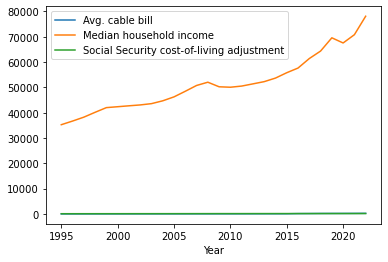

In [6]:
## Let's plot to see what we get

df.plot(x = "Year", 
        y = ["Avg. cable bill", 
             "Median household income", 
             "Social Security cost-of-living adjustment"], 
        )

## Finding: 

We see nothing because the cable bill is so small compared to median income. 

We know we must index instead.

## Create percent change columns for each

step 1 - find the fixed values for each)

In [7]:
## fixed variable for cable bill, median income and social security

cable_old = df["Avg. cable bill"].iat[0]
median_old = df["Median household income"].iat[0]
social_old = df["Social Security cost-of-living adjustment"].iat[0]

In [8]:
## confirm values

print(f"cable_old: {cable_old}")
print(f"median_old: {median_old}")
print(f"social_old: {social_old}")

cable_old: 22.35
median_old: 35249
social_old: 100.0


In [9]:
## pct_change for average cable bill

df["cable_pct"] = \
((df["Avg. cable bill"] - cable_old) / cable_old) * 100

df

,Year,Avg. cable bill,Median household income,Social Security cost-of-living adjustment,cable_pct
0,1995,22.35,35249,100.0,0.000000
1,1996,23.28,36689,102.6,4.161074
2,1997,26.31,38229,105.6,17.718121
3,1998,27.88,40148,107.8,24.742729
4,1999,28.94,41994,109.2,29.485459
5,2000,31.22,42349,111.9,39.686801
6,2001,33.75,42710,115.8,51.006711
7,2002,36.47,43057,118.9,63.176734
8,2003,38.95,43564,120.5,74.272931
9,2004,41.04,44684,123.0,83.624161


In [10]:
## pct_change for average median income

df["income_pct"] = \
((df["Median household income"] - median_old) / median_old) * 100

df

,Year,Avg. cable bill,Median household income,Social Security cost-of-living adjustment,cable_pct,income_pct
0,1995,22.35,35249,100.0,0.000000,0.000000
1,1996,23.28,36689,102.6,4.161074,4.085222
2,1997,26.31,38229,105.6,17.718121,8.454141
3,1998,27.88,40148,107.8,24.742729,13.898267
4,1999,28.94,41994,109.2,29.485459,19.135295
5,2000,31.22,42349,111.9,39.686801,20.142415
6,2001,33.75,42710,115.8,51.006711,21.166558
7,2002,36.47,43057,118.9,63.176734,22.150983
8,2003,38.95,43564,120.5,74.272931,23.589322
9,2004,41.04,44684,123.0,83.624161,26.766717


In [11]:
## pct_change for social security increases

df["social_pct"] = \
((df["Social Security cost-of-living adjustment"] - social_old) / social_old) * 100

df

,Year,Avg. cable bill,Median household income,Social Security cost-of-living adjustment,cable_pct,income_pct,social_pct
0,1995,22.35,35249,100.0,0.000000,0.000000,0.0
1,1996,23.28,36689,102.6,4.161074,4.085222,2.6
2,1997,26.31,38229,105.6,17.718121,8.454141,5.6
3,1998,27.88,40148,107.8,24.742729,13.898267,7.8
4,1999,28.94,41994,109.2,29.485459,19.135295,9.2
5,2000,31.22,42349,111.9,39.686801,20.142415,11.9
6,2001,33.75,42710,115.8,51.006711,21.166558,15.8
7,2002,36.47,43057,118.9,63.176734,22.150983,18.9
8,2003,38.95,43564,120.5,74.272931,23.589322,20.5
9,2004,41.04,44684,123.0,83.624161,26.766717,23.0


<AxesSubplot:xlabel='Year'>

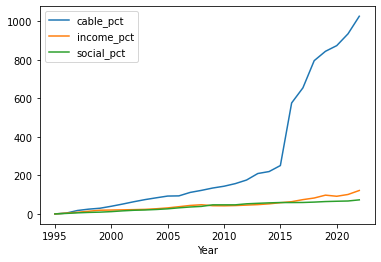

In [13]:
## plot percent increases only
df.plot(x = "Year",
       y = ["cable_pct",
           "income_pct",
           "social_pct"])

<AxesSubplot:title={'center':'Cable bills outpace inflation'}, xlabel='Year'>

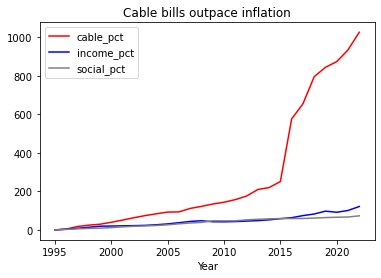

In [16]:
## improve the plot
df.plot(x = "Year",
       y = ["cable_pct",
           "income_pct",
           "social_pct"],
       title = "Cable bills outpace inflation",
       style = {"cable_pct": "red",
               "income_pct": "blue",
               "social_pct": "gray"})

Thesis: Since the landmark Telecommunications Act of 1996 cable prices have steadily risen faster than median income and social security cost-of-living adjustments. But around 2015, cable prices spiked and outpaced wages or cost-of-living adjustments.

Reporting: what happened in 2015?